## Business Problem

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
import warnings 
warnings.filterwarnings('ignore')
import pandas_profiling
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso,Ridge
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
plt.style.use('ggplot')
#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Moudles related to feature selection
from sklearn.feature_selection import RFE,SelectKBest,f_classif

## Create UDFs

In [2]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

## Import Data

In [3]:
df1 = pd.read_csv('E:/DataTrained/Intership_Flip Robo/final_projects/zomato.csv',encoding='ISO-8859-1')
pd. set_option('display.max_columns', 700)
pd.set_option('display.width', 100)
df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
df2=pd.read_excel('E:/DataTrained/Intership_Flip Robo/final_projects/Country-Code.xlsx')
df2

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [5]:
# merge both dataset to one DataFrame
df=pd.merge(df1,df2,on='Country Code',how='left')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901,Turkey


## Data Inspection

In [6]:
#profile = pandas_profiling.ProfileReport(df)
#profile.to_widgets()

In [7]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
# Dimensions of the dataset
df.shape

(9551, 22)

##### The Dataset  has 9551 rows and 22 columns consists of 8 continous variables and 14 categorical

In [9]:
# check duplicate values
df.duplicated().sum()

0

##### There are no duplicated data.

In [10]:
# Check null values in  data
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

##### Only the Cuisines feature have 9 missing values.

In [11]:
df[df.Cuisines.isnull()]['Restaurant Name'].values

array(['Cookie Shoppe', "Pearly's Famous Country Cookng",
       "Jimmie's Hot Dogs", 'Corkscrew Cafe', 'Dovetail',
       'HI Lite Bar & Lounge', 'Hillstone', "Leonard's Bakery",
       'Tybee Island Social Club'], dtype=object)

In [12]:
# delete thoese records as they are < 1%
df.dropna(inplace=True)
df.shape

(9542, 22)

In [13]:
# Value counts for every feature to check the missing again or unique values
for i in df.columns:
    print(df[i].value_counts())
    print('**********************************')

6317637     1
18336474    1
18382047    1
18441566    1
18441669    1
           ..
18451576    1
580         1
308703      1
60          1
5927402     1
Name: Restaurant ID, Length: 9542, dtype: int64
**********************************
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
The Town House Cafe          1
The G.T. Road                1
The Darzi Bar & Kitchen      1
Smoke On Water               1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7437, dtype: int64
**********************************
1      8652
216     425
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64
**********************************
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          2

Switch to order menu is constant feature so i'll drop it.

Restaurant ID feature has high cardinality so i'll drop it.

Locality Verbose feature i'll drop it as there are another similar feature called Locality.

Country Code feature i'll drop it as it useless now after merging the two tables.

In [14]:
#Droping unnecessary columns from as shown above.
df.drop(['Restaurant ID','Switch to order menu','Locality Verbose','Country Code'],axis=1,inplace=True)

In [15]:
# check shape after dropping the features
df.shape

(9542, 18)

In [16]:
# split train data to continous and categorical varaiables.
num=df.select_dtypes(include=['float64','int64'])
cat=df.select_dtypes(include=['object'])

In [17]:
# Descriptive analysis for continous data
num.apply(continuous_var_summary)

,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
N,9542.000000,9542.000000,9.542000e+03,9542.000000,9542.000000,9.542000e+03
NMISS,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
SUM,613312.025852,246646.688478,1.145351e+07,17223.000000,25431.700000,1.495919e+06
MEAN,64.274997,25.848532,1.200326e+03,1.804968,2.665238,1.567721e+02
MEDIAN,77.192031,28.570444,4.000000e+02,2.000000,3.200000,3.100000e+01
STD,41.197602,11.010094,1.612874e+04,0.905563,1.516588,4.302033e+02
VAR,1697.242427,121.222165,2.601364e+08,0.820044,2.300038,1.850749e+05
MIN,-157.948486,-41.330428,0.000000e+00,1.000000,0.000000,0.000000e+00
P1,-93.689461,-26.065802,1.000000e+01,1.000000,0.000000,0.000000e+00
P5,-43.211114,0.000000,4.000000e+01,1.000000,0.000000,0.000000e+00


There are skewness and outliers in the numerical data

In [18]:
# Descriptive analysis for categorical data
cat.describe(include='O')

,Restaurant Name,City,Address,Locality,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Rating color,Rating text,Country
count,9542,9542,9542,9542,9542,9542,9542,9542,9542,9542,9542,9542
unique,7437,140,8910,1206,1825,12,2,2,2,6,6,15
top,Cafe Coffee Day,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,North Indian,Indian Rupees(Rs.),No,No,No,Orange,Average,India
freq,83,5473,11,122,936,8652,8384,7091,9508,3734,3734,8652


-------------------------------------------------------------------------------------------------------------------------------

## EDA

#### Univariate analysis

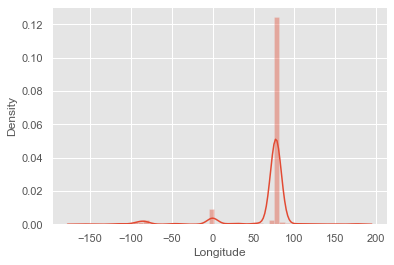

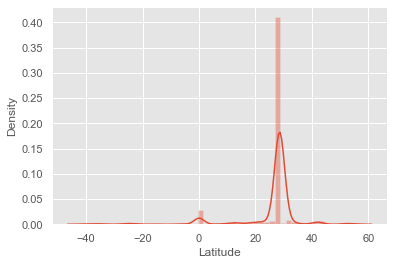

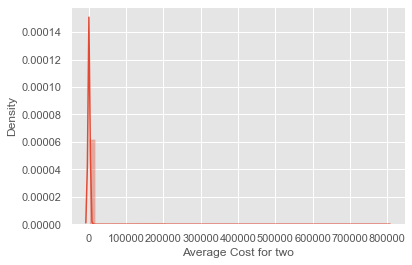

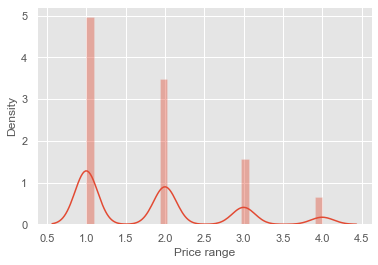

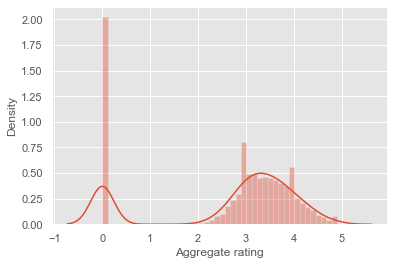

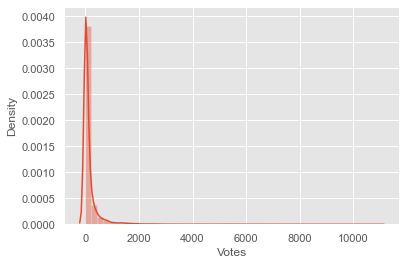

In [19]:
for i in num.columns:
    sns.distplot(num[i])
    plt.show()

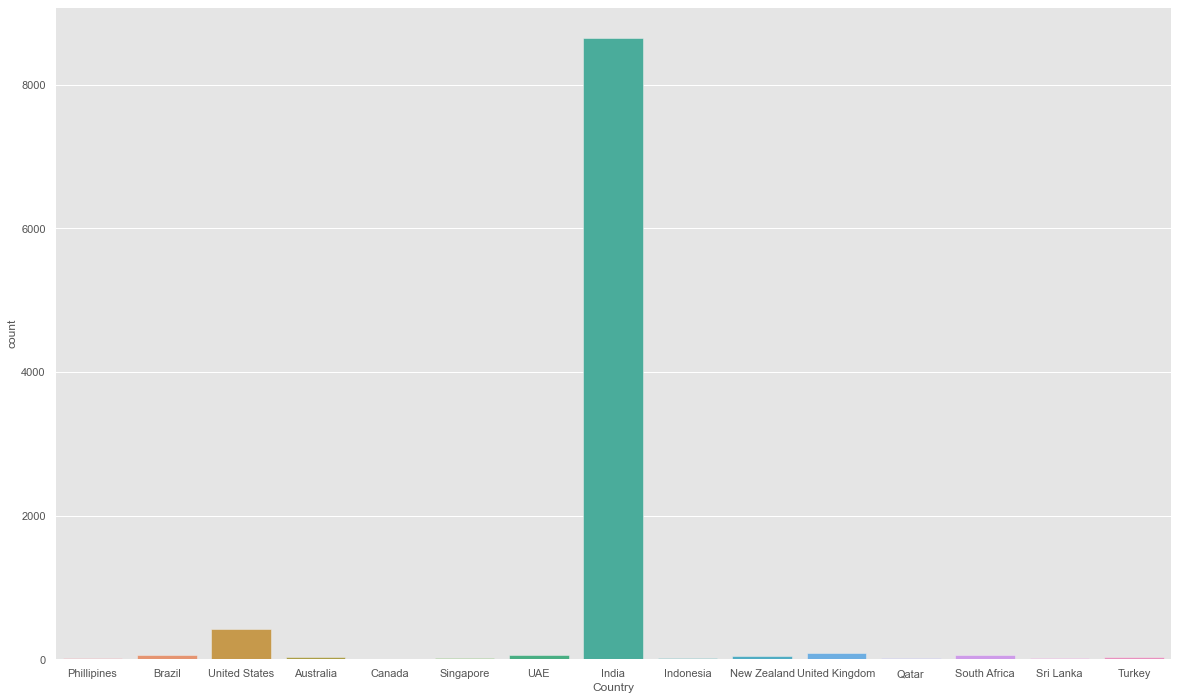

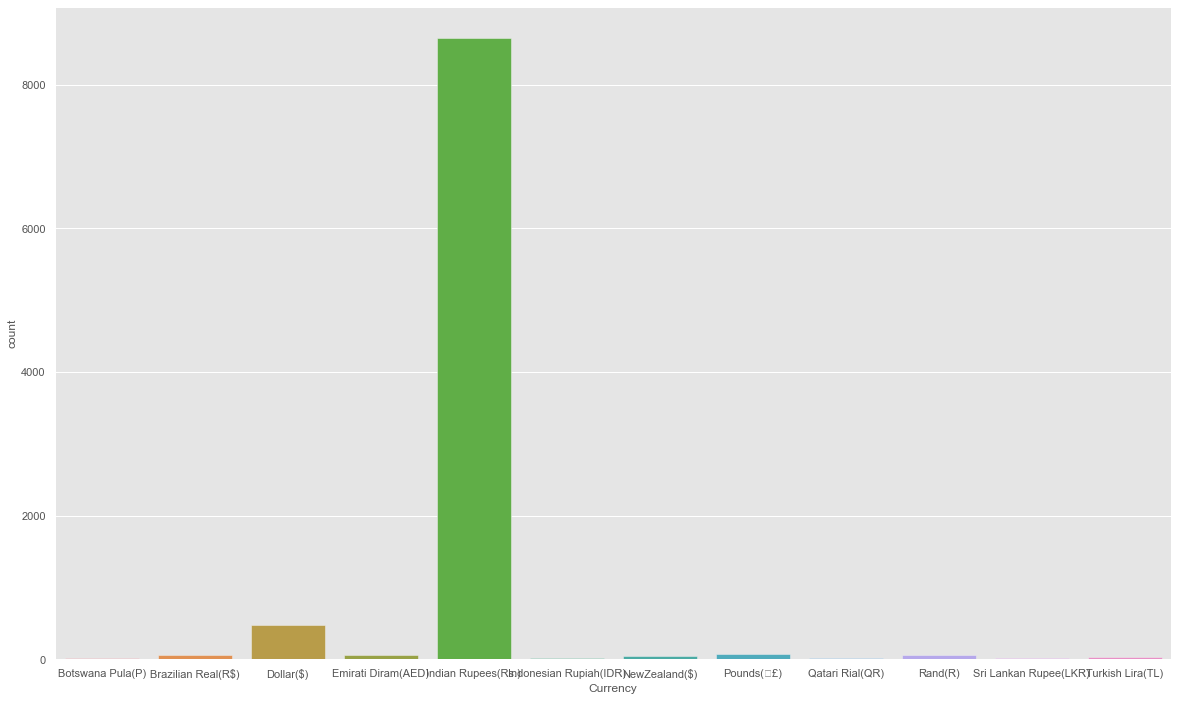

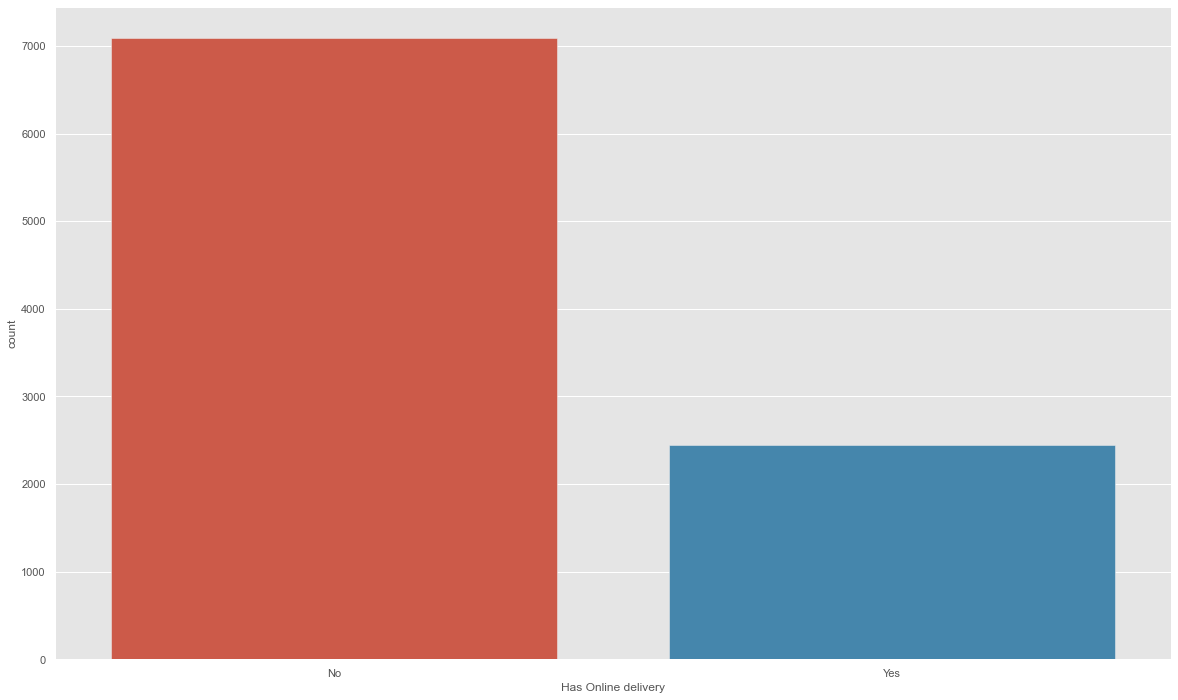

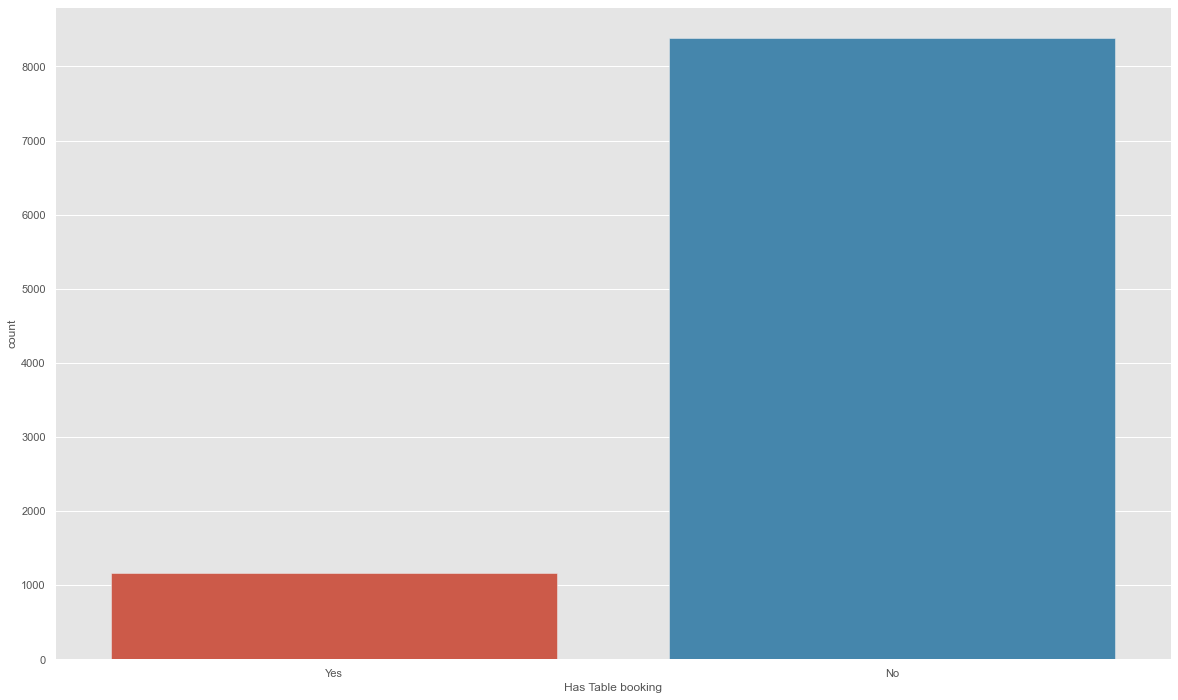

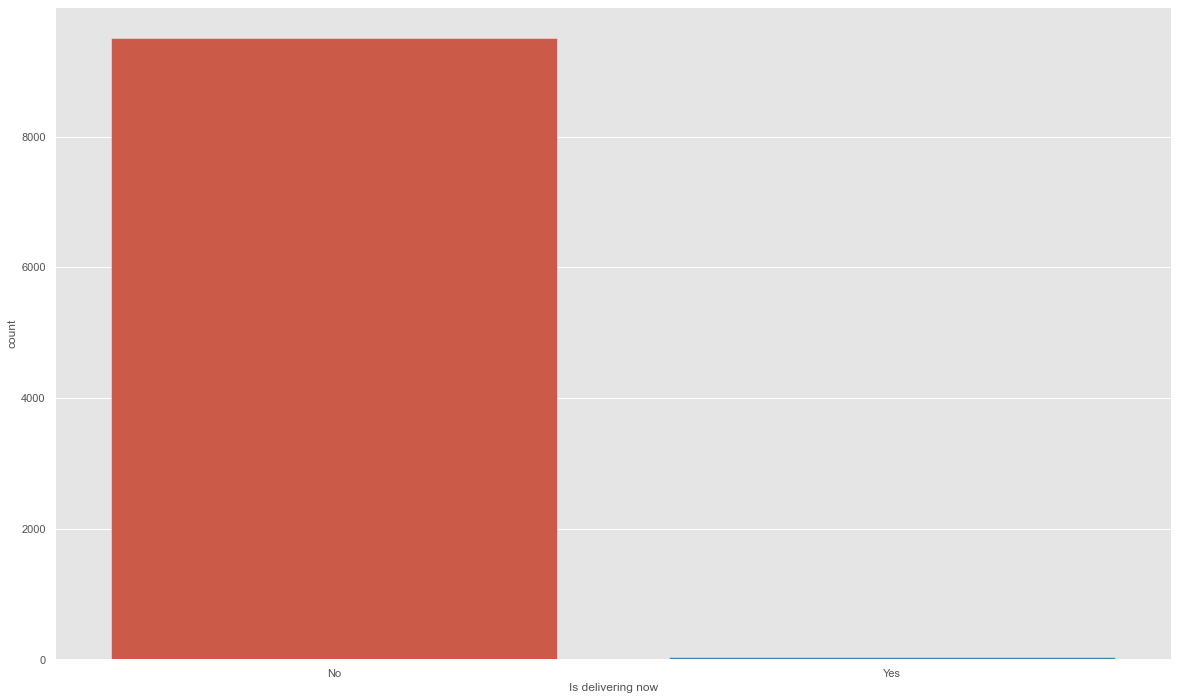

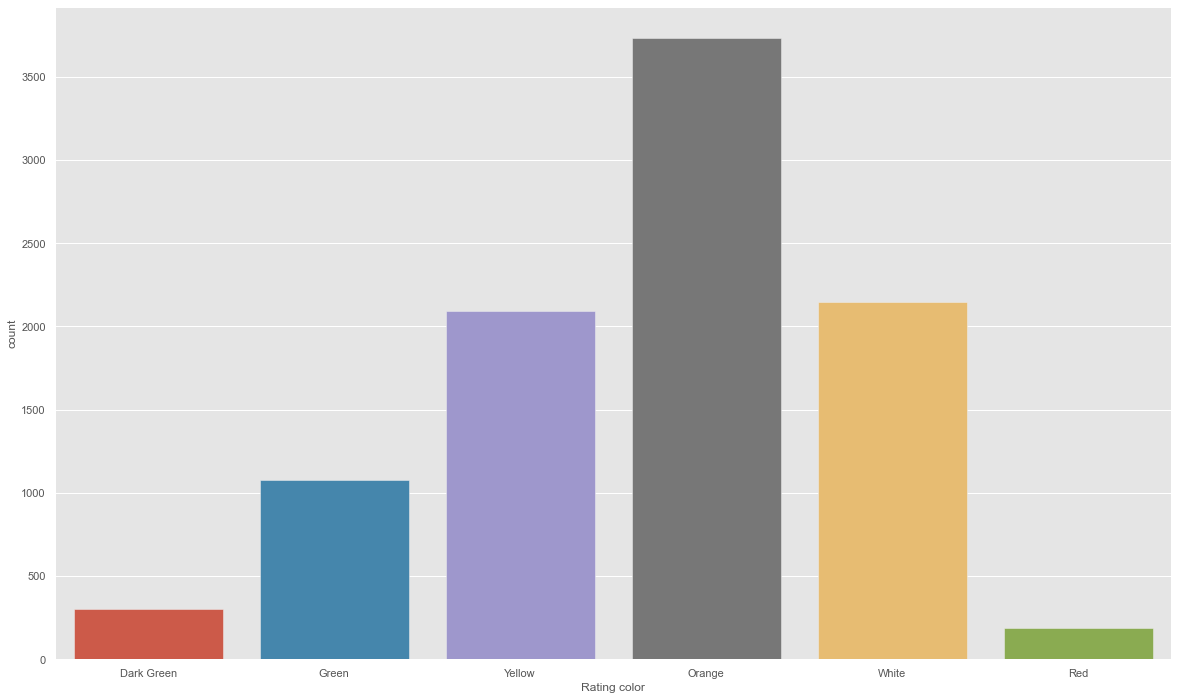

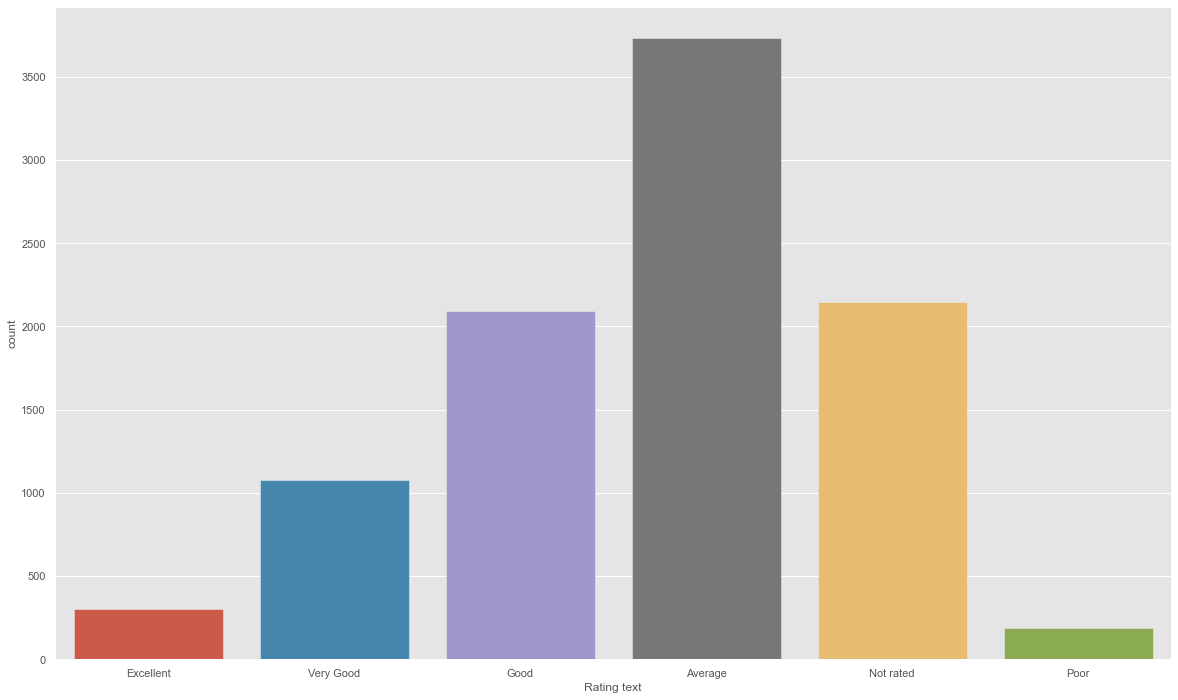

In [20]:
# Check count of categorical data
for i in cat.columns.difference(['Restaurant Name','Cuisines','City','Address','Locality']):
    plt.figure(figsize=(20,12))
    sns.countplot(cat[i])
    plt.show()

Most restaurants in the dataset are from india (90%).

Most reataurants has niether online delivery nor table booking.

Orange is the dominant rating color and average rating.

##### Since India has the largest numbers of restaurants, so will analyse India.

------------------------------------------------------------------------------------------------------------------------------

#### Bivariate analysis

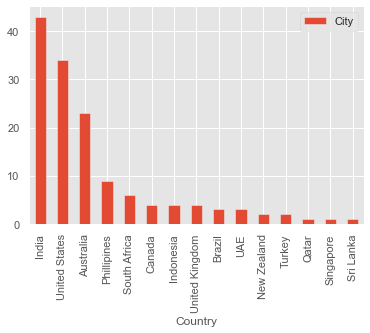

In [21]:
# country vs cities
df.groupby(['Country'])['City'].nunique().sort_values(ascending=False).plot(kind='bar',legend=True)
plt.show()

Zomato is present in 43 cities in India and 35 in the USA and 23 in Australia and the rest are the  12 cities. So it validates the previous assumption that India and USA can be compared.

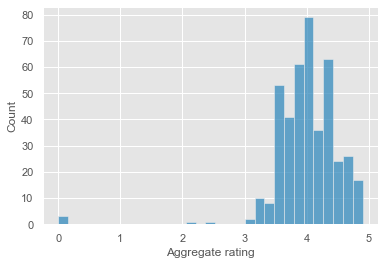

In [22]:
# USA ratings
d=df[df['Country']=='United States']
sns.histplot(d['Aggregate rating'])
plt.show()

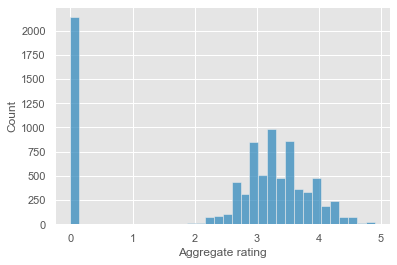

In [23]:
# India ratings
d=df[df['Country']=='India']
sns.histplot(d['Aggregate rating'])
plt.show()

USA restaurants have higher ratings compared with Indian restaurants, this could indicate a better service in the US. A major of Indian restaurant ratings are zero.

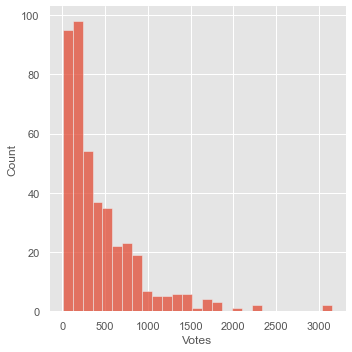

In [24]:
# USA Votes
d=df[df['Country']=='United States']
sns.displot(d['Votes'])
plt.show()

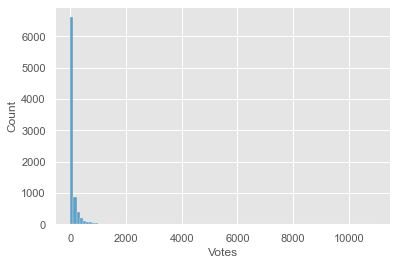

In [25]:
# India Votes
d=df[df['Country']=='India']
sns.histplot(d['Votes'],bins=100)
plt.show()

We check the rating count in the Indian subcontinent vs the US. US customers have a higher vote count than Indians, reiterating the previous finding of ratings.

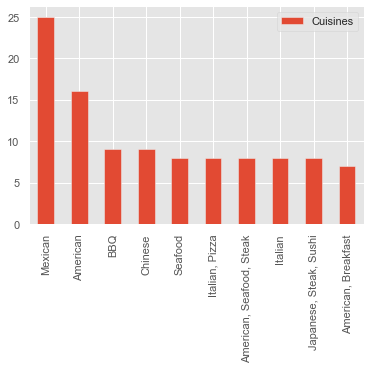

In [26]:
# USA cuisines
d=df[df['Country']=='United States']
d['Cuisines'].value_counts().head(10).plot(kind='bar',legend=True)
plt.show()

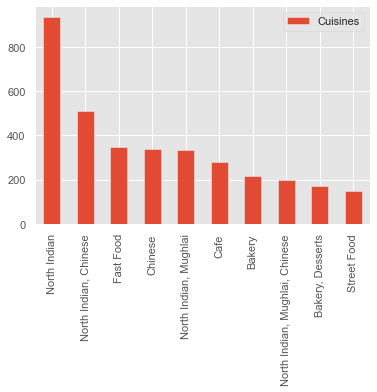

In [27]:
# India cuisines
d=df[df['Country']=='India']
d['Cuisines'].value_counts().head(10).plot(kind='bar',legend=True)
plt.show()

North Indian, Chinese, Fast food, Mughlai are a few popular cuisines in India, so new restaurants opening up in this space can face stiff competition from established restaurants. The potential for growth in south Indian cuisines seems good due to the lack of competition and variety of vegetarian dishes.

Americans love everything American – steak, seafood, burgers, BBQ apart from Mexican and Chinese food.

-------------------------------------------------------------------------------------------------------------------------------

##### India is the dominant in this dataset so i will do will consider it now for my model.

In [28]:
data=df[df['Country']=='India']
data.head()

,Restaurant Name,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
624,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,3,3.9,Yellow,Good,140,India
625,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,2,3.5,Yellow,Good,71,India
626,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,2,3.6,Yellow,Good,94,India
627,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,2,4.0,Green,Very Good,87,India
628,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,3,4.2,Green,Very Good,177,India


In [29]:
data.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index()

,Aggregate rating,Rating color,Rating text,0
0,0.0,White,Not rated,2139
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,26
6,2.3,Red,Poor,46
7,2.4,Red,Poor,83
8,2.5,Orange,Average,109
9,2.6,Orange,Average,190


In [30]:
# Ratings

top_rated=data[data['Aggregate rating']>4.4]
low_rated=data[data['Aggregate rating']<3.5]

In [31]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [32]:
# top rated restauranys 
figure=px.bar(top_rated,x='City',y='Aggregate rating')
figure.show()

In [33]:
# low rated restaurants 
figure=px.bar(low_rated,x='City',y='Aggregate rating')
figure.show()

In [34]:
# city wise 
figure=px.scatter(low_rated,x='City',y='Aggregate rating',color='Rating color')
figure.show()

In [35]:
# top rated restaurants on map

fig=px.scatter_mapbox(top_rated,lat='Latitude',lon='Longitude',hover_name='City',hover_data=
                      ['Aggregate rating','Restaurant Name'], color_discrete_sequence=['fuchsia'], zoom=5, height=300)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(title='Highly rated Restaurants locations',autosize=True,hovermode='closest',showlegend=False)
fig.update_layout(autosize=False,width=800,height=500)
fig.show()

### Outliers treatment

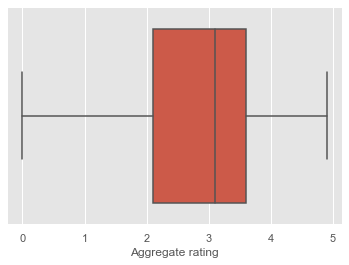

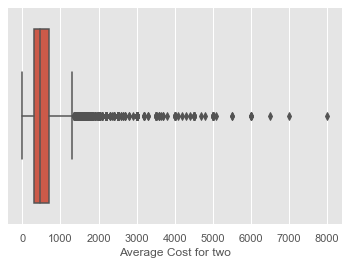

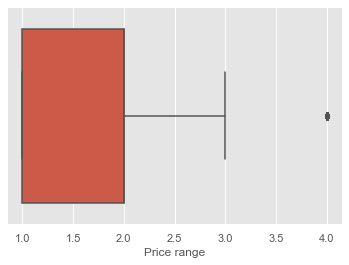

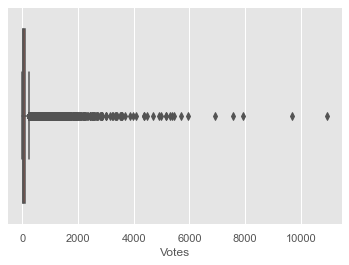

In [36]:
# Check outliers using boxplot
for col in num.columns.difference(['Longitude','Latitude']):
    sns.boxplot(data[col])
    plt.show()

In [37]:
# use Z-score method
outliers=data[num.columns.difference(['Longitude','Latitude'])]
z=np.abs(zscore(outliers))
df_new=data[(z<3).all(axis=1)]
df_new

,Restaurant Name,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
624,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,3,3.9,Yellow,Good,140,India
625,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,2,3.5,Yellow,Good,71,India
626,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,2,3.6,Yellow,Good,94,India
627,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,2,4.0,Green,Very Good,87,India
628,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,3,4.2,Green,Very Good,177,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9271,D Cabana,Vizag,"Beach Road, Near Bus Stop, Sagar Nagar, Visakh...",Sagar Nagar,83.361377,17.764287,"Continental, Seafood, Chinese, North Indian, B...",600,Indian Rupees(Rs.),No,No,No,2,3.6,Yellow,Good,193,India
9272,Kaloreez,Vizag,"Plot 95, Opposite St. Lukes Nursing School, Da...",Siripuram,0.000000,0.000000,"Cafe, North Indian, Chinese",400,Indian Rupees(Rs.),No,No,No,2,3.7,Yellow,Good,85,India
9273,Plot 17,Vizag,"Plot 17, Gangapur Layout, Siripuram, Vizag",Siripuram,83.315281,17.719539,"Burger, Pizza, Biryani",600,Indian Rupees(Rs.),No,No,No,2,4.3,Green,Very Good,172,India
9274,Vista - The Park,Vizag,"The Park, Beach Road, Pedda Waltair, Lawsons B...","The Park, Lawsons Bay",83.336840,17.721182,"American, North Indian, Thai, Continental",1500,Indian Rupees(Rs.),No,No,No,4,3.8,Yellow,Good,74,India


In [38]:
# data loss percentage

loss_percentage= ((data.shape[0]- df_new.shape[0])/data.shape[0])*100
loss_percentage

3.7679149329634765

##### It's acceptable.

In [39]:
# Check Skewness
df_new.skew()

Longitude              -3.691142
Latitude               -3.232362
Average Cost for two    1.740235
Price range             0.977583
Aggregate rating       -0.849235
Votes                   3.700299
dtype: float64

In [40]:
# I'll consider -0.5/0.5 is ok among features skewness and treat the others features.

skew_cols=['Average Cost for two','Price range','Aggregate rating','Votes']

In [41]:
# withing Power transformer to treat skewness
scaler = PowerTransformer()
df_new[skew_cols] = scaler.fit_transform(df_new[skew_cols].values)

In [42]:
df_new.columns

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [43]:
# drop unnecessary columns
df_new.drop(columns=['Restaurant Name','Is delivering now','Address','Locality','Currency','Country'],axis=1,inplace=True)

In [44]:
# Encoding

# use getdummies for nominal features like; gelocation source and other fuel, while use ordinal encoder for target feature

#Encoding the target feature:

encode_cols=["City","Cuisines"]


from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in encode_cols:
    df_new[i]=enc.fit_transform(df_new[i].values.reshape(-1,1))
    
df_new=pd.get_dummies(df_new,columns=['Has Table booking','Has Online delivery','Rating color', 'Rating text'],drop_first=True)

In [45]:
df_new

,City,Longitude,Latitude,Cuisines,Average Cost for two,Price range,Aggregate rating,Votes,Has Table booking_Yes,Has Online delivery_Yes,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_White,Rating color_Yellow,Rating text_Excellent,Rating text_Good,Rating text_Not rated,Rating text_Poor,Rating text_Very Good
624,0.0,78.011544,27.161661,1070.0,0.949893,1.463471,1.060167,1.006844,0,0,0,0,0,0,1,0,1,0,0,0
625,0.0,0.000000,0.000000,1070.0,0.645136,0.777773,0.686215,0.650847,0,0,0,0,0,0,1,0,1,0,0,0
626,0.0,78.011608,27.160832,874.0,0.138808,0.777773,0.777737,0.797424,0,0,0,0,0,0,1,0,1,0,0,0
627,0.0,77.998092,27.195928,1182.0,-0.182290,0.777773,1.156902,0.756917,0,0,1,0,0,0,0,0,0,0,0,1
628,0.0,78.007553,27.201725,939.0,1.212326,1.463471,1.354203,1.130769,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9271,42.0,83.361377,17.764287,490.0,0.409794,0.777773,0.777737,1.176610,0,0,0,0,0,0,1,0,1,0,0,0
9272,42.0,0.000000,0.000000,261.0,-0.182290,0.777773,0.870575,0.744755,0,0,0,0,0,0,1,0,1,0,0,0
9273,42.0,83.315281,17.719539,150.0,0.409794,0.777773,1.454753,1.115603,0,0,1,0,0,0,0,0,0,0,0,1
9274,42.0,83.336840,17.721182,30.0,1.897367,1.812399,0.964722,0.672409,0,0,0,0,0,0,1,0,1,0,0,0


-------------------------------------------------------------------------------------------------------------------------------

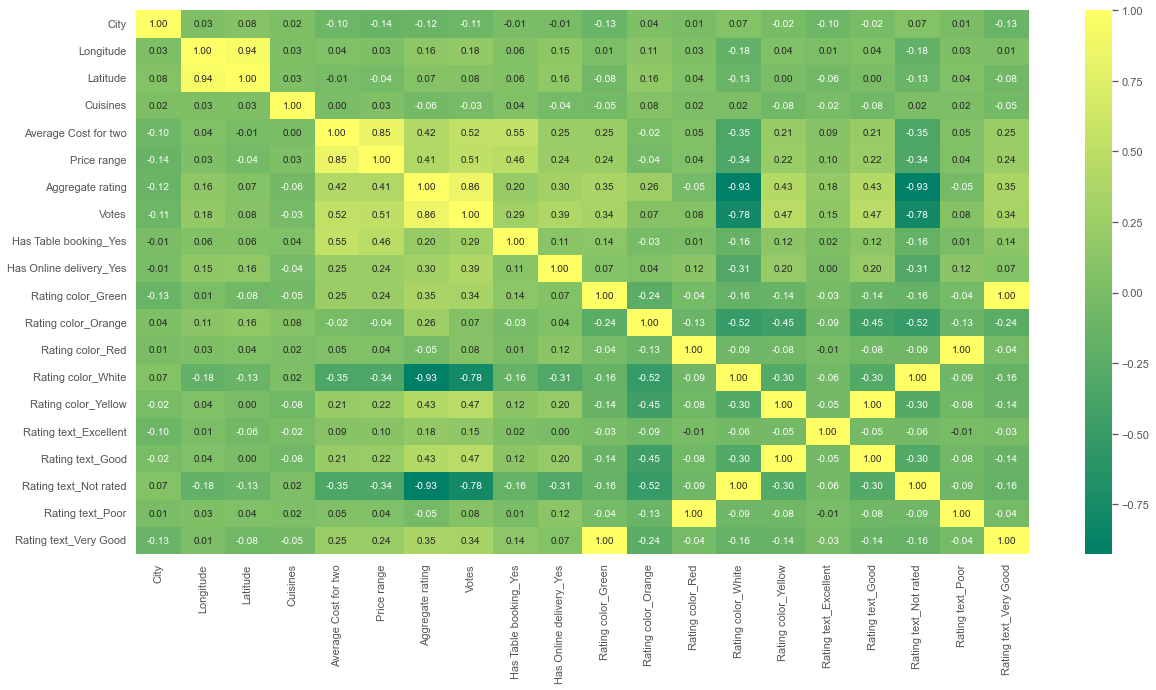

In [46]:
# heatmap correlation
plt.figure(figsize = (20,10))
sns.heatmap(df_new.corr(), annot=True,cmap='summer',fmt='.2f')
plt.show()

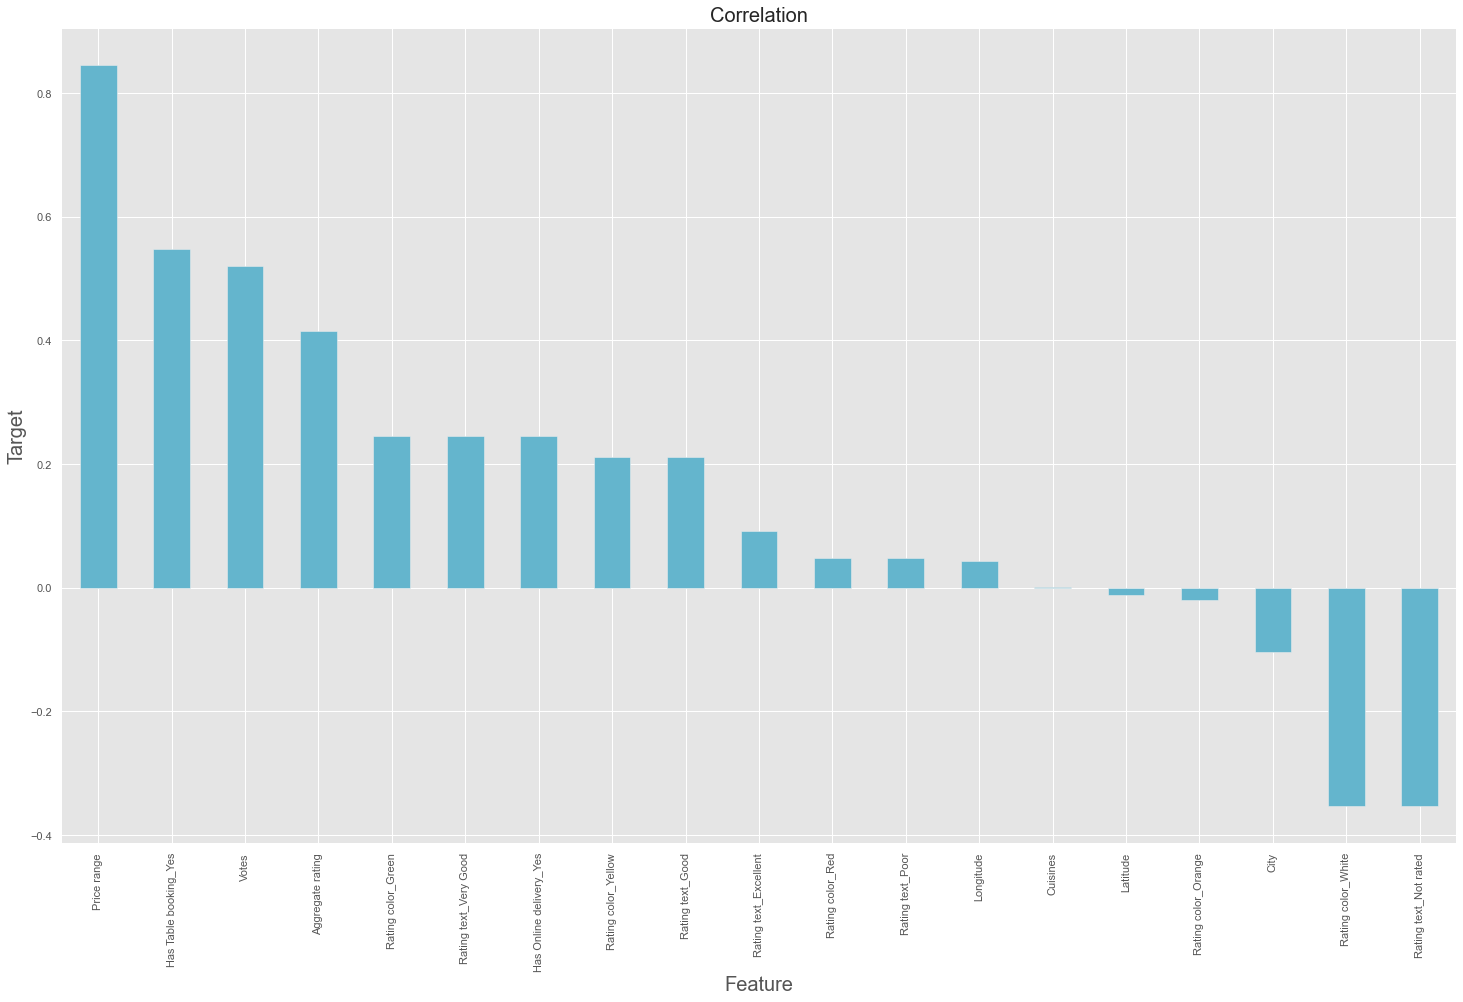

In [47]:
#Visualization of the Correlation Metrics for using (Average cost for 2) as target feature
plt.figure(figsize = (25, 15))

df_new.corr()['Average Cost for two'].sort_values(ascending = False).drop(['Average Cost for two']).plot(kind = 'bar', color = 'c')

plt.xlabel('Feature', fontsize = 20)

plt.ylabel('Target', fontsize = 20)

plt.title('Correlation', fontsize = 20)

plt.show()

Price rating is strong postive correlation withe the target.

Cusinies and latitude are least correlations.

Rating colcor_white is the most negative correlation.

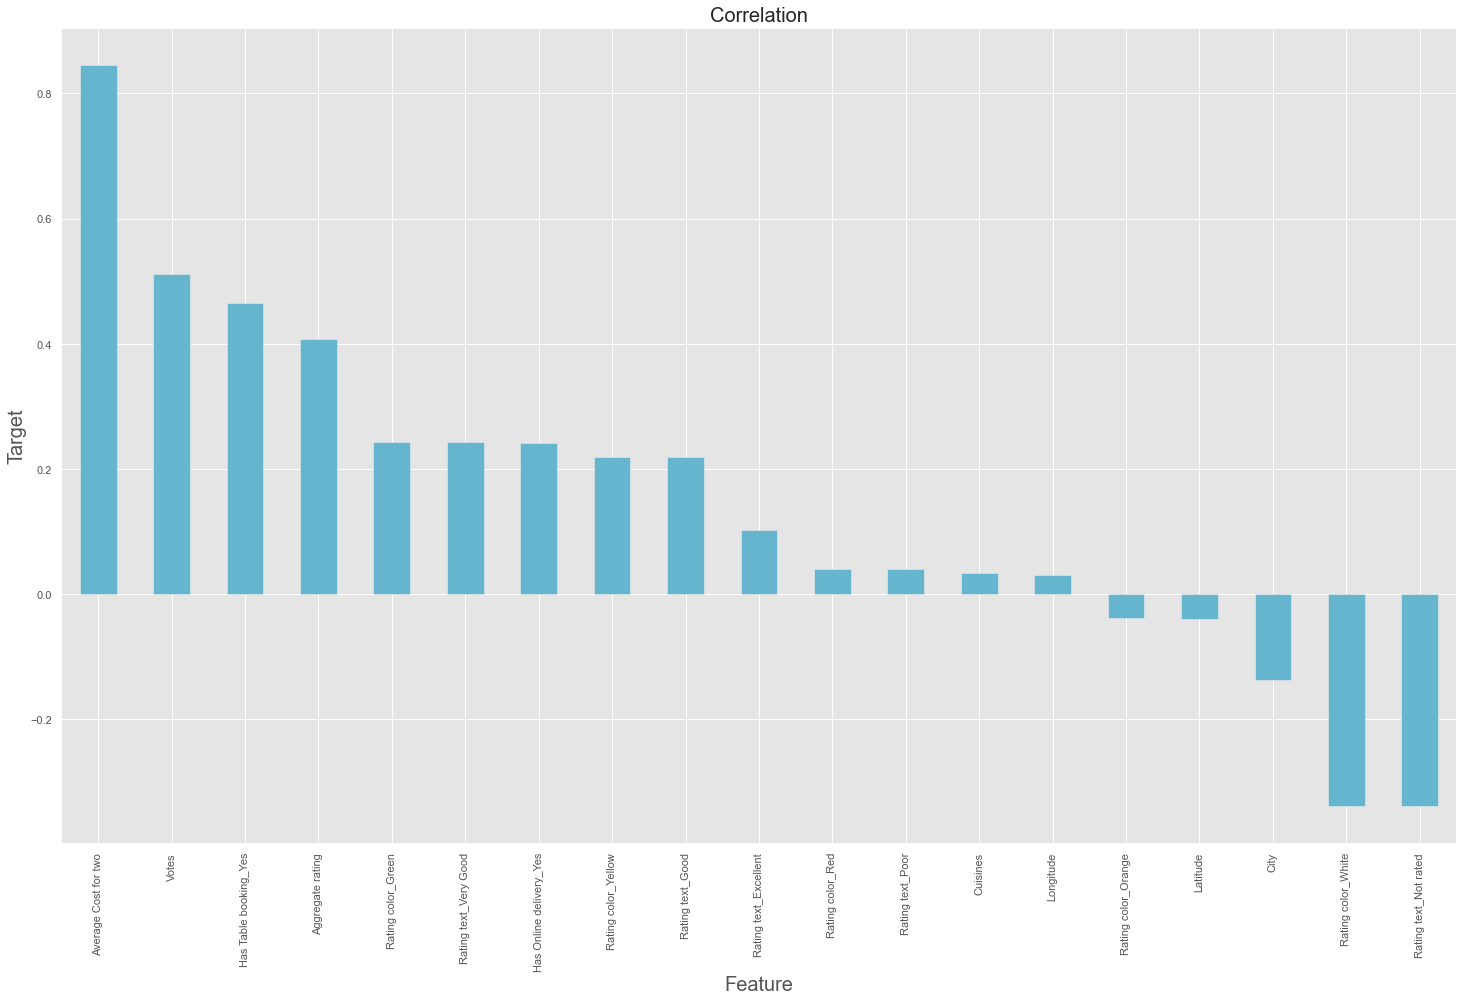

In [48]:
#Visualization of the Correlation Metrics for using (Price range)) as target feature
plt.figure(figsize = (25, 15))

df_new.corr()['Price range'].sort_values(ascending = False).drop(['Price range']).plot(kind = 'bar', color = 'c')

plt.xlabel('Feature', fontsize = 20)

plt.ylabel('Target', fontsize = 20)

plt.title('Correlation', fontsize = 20)

plt.show()

Average cost for two `is strong postive correlation withe the target.

## Regression Problem (Average cost for two)

In [50]:
# Rainfall is the target feature now.
x = df_new.drop('Average Cost for two',axis=1)
y = df_new['Average Cost for two']

### Standarization

In [51]:
sc= StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns = x.columns)
x

,City,Longitude,Latitude,Cuisines,Price range,Aggregate rating,Votes,Has Table booking_Yes,Has Online delivery_Yes,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_White,Rating color_Yellow,Rating text_Excellent,Rating text_Good,Rating text_Not rated,Rating text_Poor,Rating text_Very Good
0,-3.717960,0.290958,0.106622,1.043113,1.463471,1.060167,1.006844,-0.350297,-0.62839,-0.271858,-0.880062,-0.147803,-0.587429,1.959052,-0.100954,1.959052,-0.587429,-0.147803,-0.271858
1,-3.717960,-3.963475,-3.741286,1.043113,0.777773,0.686215,0.650847,-0.350297,-0.62839,-0.271858,-0.880062,-0.147803,-0.587429,1.959052,-0.100954,1.959052,-0.587429,-0.147803,-0.271858
2,-3.717960,0.290962,0.106504,0.521909,0.777773,0.777737,0.797424,-0.350297,-0.62839,-0.271858,-0.880062,-0.147803,-0.587429,1.959052,-0.100954,1.959052,-0.587429,-0.147803,-0.271858
3,-3.717960,0.290225,0.111476,1.340944,0.777773,1.156902,0.756917,-0.350297,-0.62839,3.678388,-0.880062,-0.147803,-0.587429,-0.510451,-0.100954,-0.510451,-0.587429,-0.147803,3.678388
4,-3.717960,0.290741,0.112298,0.694757,1.463471,1.354203,1.130769,-0.350297,-0.62839,3.678388,-0.880062,-0.147803,-0.587429,-0.510451,-0.100954,-0.510451,-0.587429,-0.147803,3.678388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8321,1.933352,0.582717,-1.224675,-0.499226,0.777773,0.777737,1.176610,-0.350297,-0.62839,-0.271858,-0.880062,-0.147803,-0.587429,1.959052,-0.100954,1.959052,-0.587429,-0.147803,-0.271858
8322,1.933352,-3.963475,-3.741286,-1.108184,0.777773,0.870575,0.744755,-0.350297,-0.62839,-0.271858,-0.880062,-0.147803,-0.587429,1.959052,-0.100954,1.959052,-0.587429,-0.147803,-0.271858
8323,1.933352,0.580203,-1.231014,-1.403355,0.777773,1.454753,1.115603,-0.350297,-0.62839,3.678388,-0.880062,-0.147803,-0.587429,-0.510451,-0.100954,-0.510451,-0.587429,-0.147803,3.678388
8324,1.933352,0.581378,-1.230781,-1.722460,1.812399,0.964722,0.672409,-0.350297,-0.62839,-0.271858,-0.880062,-0.147803,-0.587429,1.959052,-0.100954,1.959052,-0.587429,-0.147803,-0.271858


### Feature Reduction

##### F-Regression

In [52]:
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(x, y )

In [53]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(x.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [54]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value']).head(12)

In [55]:
f_reg_results

,Variable,F_Value,P_Value
0,City,90.646136,0.000
16,Rating text_Not rated,1182.301644,0.000
15,Rating text_Good,387.200065,0.000
14,Rating text_Excellent,71.642671,0.000
13,Rating color_Yellow,387.200065,0.000
12,Rating color_White,1182.301644,0.000
11,Rating color_Red,19.702266,0.000
17,Rating text_Poor,19.702266,0.000
9,Rating color_Green,535.974584,0.000
7,Has Table booking_Yes,3576.699124,0.000


In [56]:
l2_fr=f_reg_results['Variable'].values  # CI=0.9
l2_fr

array(['City', 'Rating text_Not rated', 'Rating text_Good',
       'Rating text_Excellent', 'Rating color_Yellow',
       'Rating color_White', 'Rating color_Red', 'Rating text_Poor',
       'Rating color_Green', 'Has Table booking_Yes', 'Votes',
       'Aggregate rating'], dtype=object)

### RFE

In [57]:
rfe = RFE(RandomForestRegressor(), n_features_to_select=12).fit(x,y)

In [58]:
l2_rfe = x.columns[rfe.get_support()]

In [59]:
l2_rfe

Index(['City', 'Longitude', 'Latitude', 'Cuisines', 'Price range', 'Aggregate rating', 'Votes',
       'Has Table booking_Yes', 'Has Online delivery_Yes', 'Rating color_Orange',
       'Rating color_Yellow', 'Rating text_Good'],
      dtype='object')

### SKB

In [60]:
SKB = SelectKBest(f_classif, k=12).fit(x, y )

In [61]:
l3_skb = x.columns[SKB.get_support()]

In [62]:
l3_skb

Index(['Price range', 'Aggregate rating', 'Votes', 'Has Table booking_Yes',
       'Has Online delivery_Yes', 'Rating color_Green', 'Rating color_Orange',
       'Rating color_White', 'Rating color_Yellow', 'Rating text_Good', 'Rating text_Not rated',
       'Rating text_Very Good'],
      dtype='object')

In [63]:
list(set(list(l2_fr)+list(l2_rfe)+list(l3_skb)))

['Rating color_Green',
 'Aggregate rating',
 'Rating color_Yellow',
 'Votes',
 'Latitude',
 'Longitude',
 'Rating text_Poor',
 'Rating text_Very Good',
 'Rating text_Not rated',
 'Rating text_Excellent',
 'City',
 'Rating color_Orange',
 'Has Table booking_Yes',
 'Rating color_White',
 'Cuisines',
 'Has Online delivery_Yes',
 'Rating color_Red',
 'Rating text_Good',
 'Price range']

In [64]:
final_list=  ['Rating color_Yellow',
 'Price range',
 #'Aggregate rating',
 #'Rating text_Not rated',
 'City',
 'Latitude',
 'Rating color_Green',
 'Cuisines',
 #'Rating text_Excellent',
 'Has Table booking_Yes',
 #'Rating text_Very Good',
 'Votes',
 'Rating color_Orange',
 #'Rating color_Red',
 'Rating text_Poor',
 'Has Online delivery_Yes',
 'Longitude']
 #'Rating text_Good']

### VIF check Multicollinarity

In [65]:
x = x[final_list]
y = y

In [66]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [67]:
vif.sort_values(by='VIF_Factor', ascending=False, inplace=True)
vif

,VIF_Factor,features
3,9.663038,Latitude
11,9.492775,Longitude
7,4.017352,Votes
0,3.846181,Rating color_Yellow
8,2.918416,Rating color_Orange
4,2.424029,Rating color_Green
1,1.666241,Price range
6,1.324219,Has Table booking_Yes
9,1.280514,Rating text_Poor
10,1.254430,Has Online delivery_Yes


-------------------------------------------------------------------------------------------------------------------------------

## ML Alogs

In [69]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.7879746157299783 seen for random state: 40


#### Split the data

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

### Logistic Regression

In [71]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
score_train=r2_score(y_train,pred_train)
score_test=r2_score(y_test,pred_test)
mse = mean_squared_error(y_test, pred_test)

print('R2_Score_train: ',score_train)
print('R2_Score_test: ',score_test)
print('RMSE = ', np.sqrt(mse).round(4))
print('The mean absolute error', mean_absolute_error(y_test, pred_test))

R2_Score_train:  0.7485878853584784
R2_Score_test:  0.7879746157299783
RMSE =  0.4614
The mean absolute error 0.36924739314991034


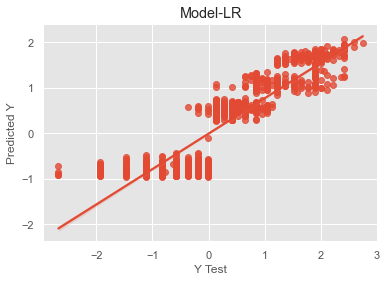

In [72]:
sns.regplot(x=y_test,y=pred_test)
plt.title("Model-LR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#### Cross Validation

In [73]:
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,scoring='r2',cv=i)
    cv_mean= cv_score.mean()
    cv_std= cv_score.std()
    print(f'At Cross fold {i} the cv score mean is {cv_mean*100} and the cv score std is {cv_std},testing accuracy score= {score_test*100}')
    print('\n')

At Cross fold 2 the cv score mean is 71.47798037512581 and the cv score std is 0.02467411732597463,testing accuracy score= 78.79746157299783


At Cross fold 3 the cv score mean is 71.3516366849594 and the cv score std is 0.05912397629643468,testing accuracy score= 78.79746157299783


At Cross fold 4 the cv score mean is 71.63948424482739 and the cv score std is 0.06965738281972716,testing accuracy score= 78.79746157299783


At Cross fold 5 the cv score mean is 73.21370285441516 and the cv score std is 0.05609705367905596,testing accuracy score= 78.79746157299783


At Cross fold 6 the cv score mean is 74.44397389811756 and the cv score std is 0.030362571684234983,testing accuracy score= 78.79746157299783


At Cross fold 7 the cv score mean is 74.66330877007346 and the cv score std is 0.02569365112053948,testing accuracy score= 78.79746157299783


At Cross fold 8 the cv score mean is 74.39386190530578 and the cv score std is 0.03676450771609787,testing accuracy score= 78.79746157299783



-------------------------------------------------------------------------------------------------------------------------------

### Regularization

##### Ridge

In [74]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    ridge = Ridge()
    ridge.fit(x_train,y_train)
    pred = ridge.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.7879759823986013 seen for random state: 40


In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=max_RS)
pred = ridge.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred))
print('The mean absolute error', mean_absolute_error(y_test, pred))
print('The mean squared error', mean_squared_error(y_test, pred))
cv = cross_val_score(ridge, x,y,cv=7)
print('The cross validation score', cv.mean())

The r2 score is: 0.788623925968726
The mean absolute error 0.3690935632520759
The mean squared error 0.21220064320167123
The cross validation score 0.7466349290254722


Text(0, 0.5, 'Predicted Y')

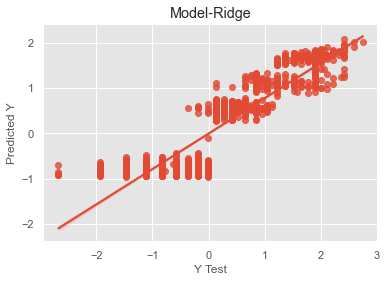

In [77]:
sns.regplot(x=y_test,y=pred)
plt.title("Model-Ridge")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

##### Lasso

In [79]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lasso = Lasso()
    lasso.fit(x_train,y_train)
    pred = lasso.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0 seen for random state: 0


### KNN

In [81]:
#Selecting the best random state to get maximum accuracy.
from sklearn.neighbors import KNeighborsRegressor
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    knn = KNeighborsRegressor()
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.7960082543218018 seen for random state: 40


In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=max_RS)

pred = knn.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred))
print('The mean absolute error', mean_absolute_error(y_test, pred))
print('The mean squared error', mean_squared_error(y_test, pred))
cv = cross_val_score(knn, x,y,cv=7)
print('The cross validation score', cv.mean())

The r2 score is: 0.8500757479047892
The mean absolute error 0.28816492996863224
The mean squared error 0.150509100294039
The cross validation score 0.7298557620692513


Text(0, 0.5, 'Predicted Y')

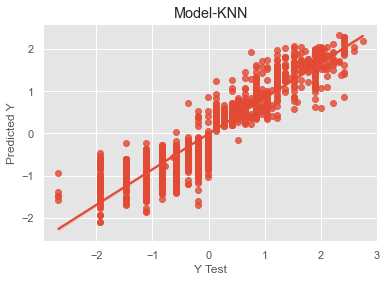

In [83]:
sns.regplot(x=y_test,y=pred)
plt.title("Model-KNN")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

-------------------------------------------------------------------------------------------------------------------------------

### SVR

In [93]:
#Selecting the best random state to get maximum accuracy.

max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    svr = SVR()
    svr.fit(x_train,y_train)
    pred = svr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.8074740388953632 seen for random state: 10


In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=max_RS)

pred = svr.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred))
print('The mean absolute error', mean_absolute_error(y_test, pred))
print('The mean squared error', mean_squared_error(y_test, pred))
cv = cross_val_score(svr, x,y,cv=7)
print('The cross validation score', cv.mean())

The r2 score is: 0.8204164732565554
The mean absolute error 0.31081332948786383
The mean squared error 0.17244540683531073
The cross validation score 0.7547540986560914


Text(0, 0.5, 'Predicted Y')

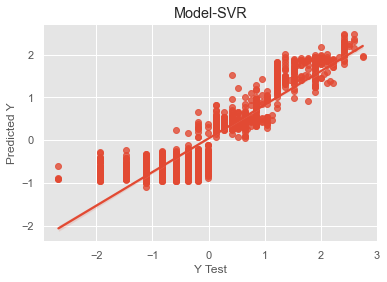

In [95]:
sns.regplot(x=y_test,y=pred)
plt.title("Model-SVR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Ensembles Techniques

### RFRegressor

In [84]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    rfr = RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred = rfr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.8564042647060179 seen for random state: 23


In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=max_RS)

pred = rfr.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred))
print('The mean absolute error', mean_absolute_error(y_test, pred))
print('The mean squared error', mean_squared_error(y_test, pred))
cv = cross_val_score(rfr, x,y,cv=7)
print('The cross validation score', cv.mean())

The r2 score is: 0.9555208412900416
The mean absolute error 0.14096128959981005
The mean squared error 0.044838938199563416
The cross validation score 0.8069920905441575


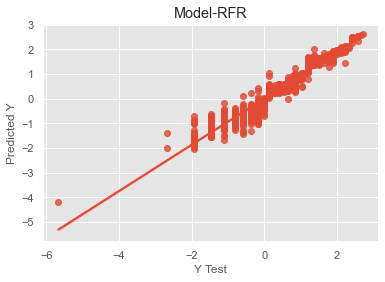

In [86]:
sns.regplot(x=y_test,y=pred)
plt.title("Model-RFR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

------------------------------------------------------------------------------------------------------------------------------

### GBRegressor

In [87]:
#Selecting the best random state to get maximum accuracy.

max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    gbr=GradientBoostingRegressor()
    gbr.fit(x_train,y_train)
    pred=gbr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.8548396853632555 seen for random state: 33


In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=max_RS)

pred = gbr.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred))
print('The mean absolute error', mean_absolute_error(y_test, pred))
print('The mean squared error', mean_squared_error(y_test, pred))
cv = cross_val_score(gbr, x,y,cv=7)
print('The cross validation score', cv.mean())

The r2 score is: 0.8619120643231478
The mean absolute error 0.2814809397214365
The mean squared error 0.13067329256428054
The cross validation score 0.81422177554112


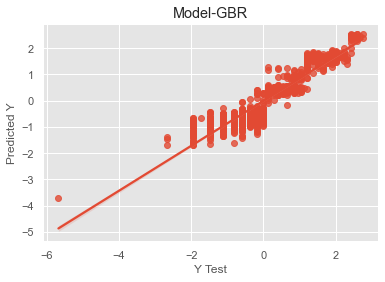

In [89]:
sns.regplot(x=y_test,y=pred)
plt.title("Model-GBR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### XGBoost

In [90]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    xgb=XGBRegressor()
    xgb.fit(x_train,y_train)
    xgb_pred=xgb.predict(x_test)
    acc = r2_score(y_test, xgb_pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.8544776916783522 seen for random state: 15


In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=max_RS)

pred = xgb.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred))
print('The mean absolute error', mean_absolute_error(y_test, pred))
print('The mean squared error', mean_squared_error(y_test, pred))
cv = cross_val_score(gbr, x,y,cv=7)
print('The cross validation score', cv.mean())

The r2 score is: 0.9172293035479739
The mean absolute error 0.19595238506749205
The mean squared error 0.07852386934219907
The cross validation score 0.8141692667561372


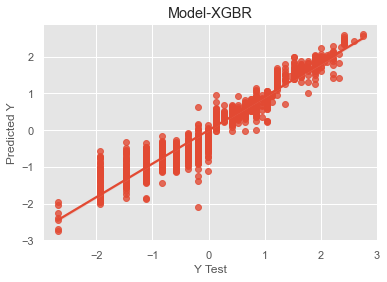

In [92]:
sns.regplot(x=y_test,y=pred)
plt.title("Model-XGBR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### ADABRegressor

In [96]:
from sklearn.ensemble import AdaBoostRegressor
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    adr=AdaBoostRegressor()
    adr.fit(x_train,y_train)
    adr_pred=adr.predict(x_test)
    acc = r2_score(y_test, adr_pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.768565292836252 seen for random state: 37


In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=max_RS)

pred = adr.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred))
print('The mean absolute error', mean_absolute_error(y_test, pred))
print('The mean squared error', mean_squared_error(y_test, pred))
cv = cross_val_score(gbr, x,y,cv=7)
print('The cross validation score', cv.mean())

The r2 score is: 0.7057921306436747
The mean absolute error 0.43196822748103253
The mean squared error 0.29520801774411104
The cross validation score 0.8141266168783788


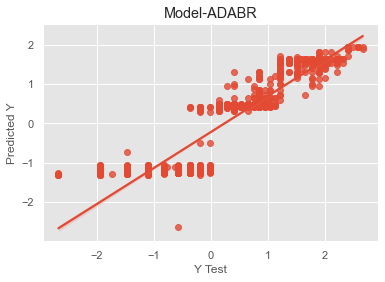

In [98]:
sns.regplot(x=y_test,y=pred)
plt.title("Model-ADABR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

------------------------------------------------------------------------------------------------------------------------------

In [99]:
np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=7))
    return(rmse)


models = [LinearRegression(),Ridge(),KNeighborsRegressor(),RandomForestRegressor(),
          XGBRegressor(),GradientBoostingRegressor(),AdaBoostRegressor()]
            
names = ['lr','ridge','knn','rfr','xgb','gbr','adr']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

lr    : 0.245712, 0.037419
ridge    : 0.245711, 0.037422
knn    : 0.265017, 0.087125
rfr    : 0.188765, 0.048213
xgb    : 0.194999, 0.048642
gbr    : 0.181066, 0.041638
adr    : 0.276548, 0.031516


### The best Algorithim is RandomForest Regressor 

#### HyperParameter Tuning

In [103]:
# Tunning for Random Forest Regressor

from sklearn.model_selection import RandomizedSearchCV

params={'min_samples_split':[5,10,15],
            'n_estimators':[100,300,500,700,1000,1200],
            'max_depth': [5,7,9,10,11,14,15],
            'max_features':['sqrt','log2','auto']}

rfr=RandomizedSearchCV(RandomForestRegressor(),params,scoring='r2',
                     cv =7, n_iter = 130, n_jobs=-1,verbose=True)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print('The r2 score is:', r2_score(y_test, y_pred))
print("\n The best estimator across ALL searched params:\n", rfr.best_estimator_)
print("\n The best score across ALL searched params:\n", rfr.best_score_)
print("\n The best parameters across ALL searched params:\n",rfr.best_params_)

Fitting 7 folds for each of 130 candidates, totalling 910 fits
The r2 score is: 0.856108860214159

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=11, max_features='auto', min_samples_split=10,
                      n_estimators=700)

 The best score across ALL searched params:
 0.8280360353582221

 The best parameters across ALL searched params:
 {'n_estimators': 700, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 11}


In [104]:
#reinstating with tuned parameters
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)
rfr_model = RandomForestRegressor(max_depth=11,max_features='auto',min_samples_split= 10,
                              n_estimators=700)
rfr_model.fit(x_train,y_train)
predrdf = rfr_model.predict(x_test)
print('The r2 score is:', r2_score(y_test, predrdf))
print('The mean absolute error', mean_absolute_error(y_test, predrdf))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,predrdf)))

The r2 score is: 0.8564284406839775
The mean absolute error 0.28456553213411107
root_mean_squared_error: 0.3804377341337033


### Saving the Model

In [105]:
#Saving the model using .pkl
import joblib
joblib.dump(rfr,'Zomato_AVG_Cost.pkl')

['Zomato_AVG_Cost.pkl']

In [106]:
# load model and get predictions

model=joblib.load('Zomato_AVG_Cost.pkl')

#Predict

prediction = model.predict(x_test)

prediction

array([ 0.35484442,  1.55180825, -0.3329048 , ..., -0.51723879,
       -0.68233102, -0.69376252])

In [107]:
pd.DataFrame([model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Original'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,...,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,1610,1611,1612,1613,1614,1615,1616,1617,1618,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1630,1631,1632,1633,1634,1635,1636,1637,1638,1639,1640,1641,1642,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663,1664,1665
Predicted,0.354844,1.551808,-0.332905,0.515739,0.867413,1.642661,1.073308,1.670711,-0.633404,-0.323012,-0.866859,0.280127,-0.951558,-1.684235,-0.854789,-0.563669,1.757363,-0.479879,0.431096,-0.65120,-0.803293,0.401303,-0.814010,-0.872864,-0.428424,1.637426,0.434269,-0.380976,-0.346003,0.145656,0.454732,-1.072868,-0.913352,0.456792,1.743266,2.117319,1.839666,0.464691,-0.804671,0.248450,0.526013,0.393899,-1.033730,-0.876346,-0.557016,-0.562771,1.390247,2.463077,-0.623511,1.700270,0.289956,-0.321037,0.502362,1.649992,0.577000,-0.877621,-0.799182,0.321943,2.012162,-0.837631,0.458100,-1.092982,-0.349588,0.429867,0.388868,-0.519442,-0.145107,0.330943,-0.778885,-0.360435,0.464881,-0.354859,1.411170,0.296679,-1.006638,-0.953473,0.368425,-1.200607,-0.761257,0.442738,0.250083,1.474245,2.624232,-1.593829,-0.303912,0.353056,0.313562,0.517779,0.527770,-0.831863,0.325207,1.611196,-0.216904,-1.596768,0.474508,1.530925,-0.499535,-0.204022,0.138803,0.398145,

------------------------------------------------------------------------------------------------------------------------------

## Regression Problem (Price range)

In [108]:
# Rainfall is the target feature now.
x = df_new.drop('Price range',axis=1)
y = df_new['Price range']

### Standarization

In [109]:
sc= StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns = x.columns)
x

,City,Longitude,Latitude,Cuisines,Average Cost for two,Aggregate rating,Votes,Has Table booking_Yes,Has Online delivery_Yes,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_White,Rating color_Yellow,Rating text_Excellent,Rating text_Good,Rating text_Not rated,Rating text_Poor,Rating text_Very Good
0,-3.717960,0.290958,0.106622,1.043113,0.949893,1.060167,1.006844,-0.350297,-0.62839,-0.271858,-0.880062,-0.147803,-0.587429,1.959052,-0.100954,1.959052,-0.587429,-0.147803,-0.271858
1,-3.717960,-3.963475,-3.741286,1.043113,0.645136,0.686215,0.650847,-0.350297,-0.62839,-0.271858,-0.880062,-0.147803,-0.587429,1.959052,-0.100954,1.959052,-0.587429,-0.147803,-0.271858
2,-3.717960,0.290962,0.106504,0.521909,0.138808,0.777737,0.797424,-0.350297,-0.62839,-0.271858,-0.880062,-0.147803,-0.587429,1.959052,-0.100954,1.959052,-0.587429,-0.147803,-0.271858
3,-3.717960,0.290225,0.111476,1.340944,-0.182290,1.156902,0.756917,-0.350297,-0.62839,3.678388,-0.880062,-0.147803,-0.587429,-0.510451,-0.100954,-0.510451,-0.587429,-0.147803,3.678388
4,-3.717960,0.290741,0.112298,0.694757,1.212326,1.354203,1.130769,-0.350297,-0.62839,3.678388,-0.880062,-0.147803,-0.587429,-0.510451,-0.100954,-0.510451,-0.587429,-0.147803,3.678388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8321,1.933352,0.582717,-1.224675,-0.499226,0.409794,0.777737,1.176610,-0.350297,-0.62839,-0.271858,-0.880062,-0.147803,-0.587429,1.959052,-0.100954,1.959052,-0.587429,-0.147803,-0.271858
8322,1.933352,-3.963475,-3.741286,-1.108184,-0.182290,0.870575,0.744755,-0.350297,-0.62839,-0.271858,-0.880062,-0.147803,-0.587429,1.959052,-0.100954,1.959052,-0.587429,-0.147803,-0.271858
8323,1.933352,0.580203,-1.231014,-1.403355,0.409794,1.454753,1.115603,-0.350297,-0.62839,3.678388,-0.880062,-0.147803,-0.587429,-0.510451,-0.100954,-0.510451,-0.587429,-0.147803,3.678388
8324,1.933352,0.581378,-1.230781,-1.722460,1.897367,0.964722,0.672409,-0.350297,-0.62839,-0.271858,-0.880062,-0.147803,-0.587429,1.959052,-0.100954,1.959052,-0.587429,-0.147803,-0.271858


### Feature Reduction

##### F-Regression

In [110]:
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(x, y )

In [111]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(x.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [112]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value']).head(12)

In [113]:
f_reg_results

,Variable,F_Value,P_Value
0,City,159.123055,0.000
16,Rating text_Not rated,1073.325307,0.000
15,Rating text_Good,422.506836,0.000
14,Rating text_Excellent,89.018381,0.000
13,Rating color_Yellow,422.506836,0.000
12,Rating color_White,1073.325307,0.000
11,Rating color_Red,13.809795,0.000
10,Rating color_Orange,12.430700,0.000
17,Rating text_Poor,13.809795,0.000
9,Rating color_Green,523.543339,0.000


In [114]:
l1_fr=f_reg_results['Variable'].values  # CI=0.9
l1_fr

array(['City', 'Rating text_Not rated', 'Rating text_Good',
       'Rating text_Excellent', 'Rating color_Yellow',
       'Rating color_White', 'Rating color_Red', 'Rating color_Orange',
       'Rating text_Poor', 'Rating color_Green', 'Has Table booking_Yes',
       'Votes'], dtype=object)

#### RFE

In [115]:
rfe = RFE(RandomForestRegressor(), n_features_to_select=12).fit(x,y)

In [116]:
l2_rfe = x.columns[rfe.get_support()]

In [117]:
l2_rfe

Index(['City', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Aggregate rating',
       'Votes', 'Has Table booking_Yes', 'Has Online delivery_Yes', 'Rating color_Orange',
       'Rating text_Good', 'Rating text_Very Good'],
      dtype='object')

#### SKB

In [118]:
SKB = SelectKBest(f_classif, k=12).fit(x, y )

In [119]:
l3_skb = x.columns[SKB.get_support()]

In [120]:
l3_skb

Index(['City', 'Average Cost for two', 'Aggregate rating', 'Votes', 'Has Table booking_Yes',
       'Has Online delivery_Yes', 'Rating color_Green', 'Rating color_White',
       'Rating color_Yellow', 'Rating text_Good', 'Rating text_Not rated',
       'Rating text_Very Good'],
      dtype='object')

In [121]:
list(set(list(l1_fr)+list(l2_rfe)+list(l3_skb)))

['Rating color_Green',
 'Aggregate rating',
 'Rating color_Yellow',
 'Votes',
 'Latitude',
 'Longitude',
 'Rating text_Poor',
 'Rating text_Very Good',
 'Rating text_Not rated',
 'Rating text_Excellent',
 'City',
 'Rating color_Orange',
 'Has Table booking_Yes',
 'Rating color_White',
 'Cuisines',
 'Has Online delivery_Yes',
 'Rating color_Red',
 'Rating text_Good',
 'Average Cost for two']

In [150]:
final_list= ['Votes',
 'Latitude',
 'Longitude',
 'Rating text_Poor',
 'Rating text_Very Good',
 #'Rating text_Not rated',
 #'Rating text_Excellent',
 'City',
 'Rating color_Orange',
 'Has Table booking_Yes',
 #'Rating color_White',
 'Cuisines',
 'Has Online delivery_Yes',
 #'Rating color_Red',
 'Rating text_Good',
 'Average Cost for two']

### VIF check Multicollinarity

In [151]:
x = x[final_list]
y = y

In [152]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [153]:
vif.sort_values(by='VIF_Factor', ascending=False, inplace=True)
vif

,VIF_Factor,features
1,9.588157,Latitude
2,9.448702,Longitude
0,4.036671,Votes
10,3.847250,Rating text_Good
6,2.914927,Rating color_Orange
4,2.424323,Rating text_Very Good
11,1.848133,Average Cost for two
7,1.472589,Has Table booking_Yes
3,1.280339,Rating text_Poor
9,1.252499,Has Online delivery_Yes


------------------------------------------------------------------------------------------------------------------------------

### ML Algo

In [154]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.7564855933441333 seen for random state: 10


In [155]:
# split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

#### Logestic Regression

In [156]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
score_train=r2_score(y_train,pred_train)
score_test=r2_score(y_test,pred_test)
mse = mean_squared_error(y_test, pred_test)

print('R2_Score_train: ',score_train)
print('R2_Score_test: ',score_test)
print('RMSE = ', np.sqrt(mse).round(4))
print('The mean absolute error', mean_absolute_error(y_test, pred_test))

R2_Score_train:  0.722953673279616
R2_Score_test:  0.7564855933441333
RMSE =  0.4963
The mean absolute error 0.4191532957318213


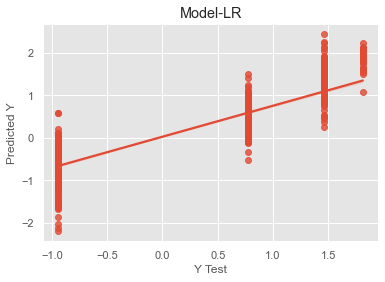

In [157]:
sns.regplot(x=y_test,y=pred_test)
plt.title("Model-LR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

##### Cross validation

In [158]:
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,scoring='r2',cv=i)
    cv_mean= cv_score.mean()
    cv_std= cv_score.std()
    print(f'At Cross fold {i} the cv score mean is {cv_mean*100} and the cv score std is {cv_std},testing accuracy score= {score_test*100}')
    print('\n')

At Cross fold 2 the cv score mean is 41.78259781819464 and the cv score std is 0.28816828018977275,testing accuracy score= 75.64855933441333


At Cross fold 3 the cv score mean is 42.62038142325763 and the cv score std is 0.4107894890758144,testing accuracy score= 75.64855933441333


At Cross fold 4 the cv score mean is 41.54582941583318 and the cv score std is 0.5269842179189791,testing accuracy score= 75.64855933441333


At Cross fold 5 the cv score mean is 66.99194112436925 and the cv score std is 0.10938621762628392,testing accuracy score= 75.64855933441333


At Cross fold 6 the cv score mean is 71.44135921972837 and the cv score std is 0.030097769038676923,testing accuracy score= 75.64855933441333


At Cross fold 7 the cv score mean is 71.39165779935617 and the cv score std is 0.023869287360297847,testing accuracy score= 75.64855933441333


At Cross fold 8 the cv score mean is 71.14093947278673 and the cv score std is 0.03331479806942239,testing accuracy score= 75.64855933441333



#### Ridge Regularization

In [159]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    ridge = Ridge()
    ridge.fit(x_train,y_train)
    pred = ridge.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.7564867041530222 seen for random state: 10


In [160]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=max_RS)
pred = ridge.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred))
print('The mean absolute error', mean_absolute_error(y_test, pred))
print('The mean squared error', mean_squared_error(y_test, pred))
cv = cross_val_score(ridge, x,y,cv=7)
print('The cross validation score', cv.mean())

The r2 score is: 0.7580932653271523
The mean absolute error 0.4181202629146652
The mean squared error 0.2447155557236632
The cross validation score 0.713918736359018


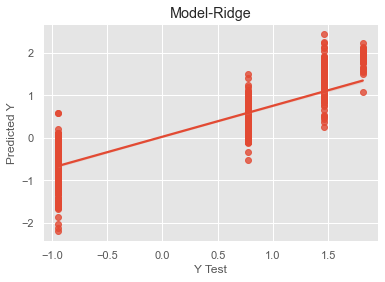

In [161]:
sns.regplot(x=y_test,y=pred_test)
plt.title("Model-Ridge")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

### KNN

In [162]:
#Selecting the best random state to get maximum accuracy.

max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    knn = KNeighborsRegressor()
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.9208280493435377 seen for random state: 92


In [163]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=max_RS)

pred = knn.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred))
print('The mean absolute error', mean_absolute_error(y_test, pred))
print('The mean squared error', mean_squared_error(y_test, pred))
cv = cross_val_score(knn, x,y,cv=6)
print('The cross validation score', cv.mean())

The r2 score is: 0.9424699525296143
The mean absolute error 0.09313573699890053
The mean squared error 0.05708902721129823
The cross validation score 0.874161121480585


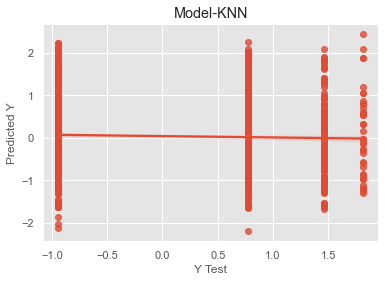

In [164]:
sns.regplot(x=y_test,y=pred_test)
plt.title("Model-KNN")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### SVR

In [165]:
#Selecting the best random state to get maximum accuracy.

max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    svr = SVR()
    svr.fit(x_train,y_train)
    pred = svr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.8635679581181857 seen for random state: 37


In [166]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=max_RS)

pred = svr.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred))
print('The mean absolute error', mean_absolute_error(y_test, pred))
print('The mean squared error', mean_squared_error(y_test, pred))
cv = cross_val_score(svr, x,y,cv=6)
print('The cross validation score', cv.mean())

The r2 score is: 0.8719690751526381
The mean absolute error 0.26659712543431413
The mean squared error 0.12972400762066238
The cross validation score 0.83152018506633


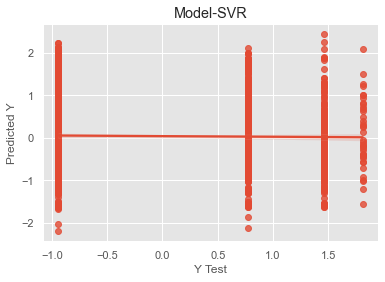

In [167]:
sns.regplot(x=y_test,y=pred_test)
plt.title("Model-SVR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

------------------------------------------------------------------------------------------------------------------------------

## RFR

In [168]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    rfr = RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred = rfr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.9964057484727242 seen for random state: 48


In [169]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=max_RS)

pred = rfr.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred))
print('The mean absolute error', mean_absolute_error(y_test, pred))
print('The mean squared error', mean_squared_error(y_test, pred))
cv = cross_val_score(rfr, x,y,cv=6)
print('The cross validation score', cv.mean())

The r2 score is: 0.9987577424484677
The mean absolute error 0.00412865941572964
The mean squared error 0.0012228769184211685
The cross validation score 0.979012833204577


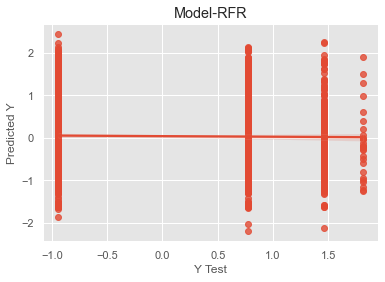

In [170]:
sns.regplot(x=y_test,y=pred_test)
plt.title("Model-RFR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

------------------------------------------------------------------------------------------------------------------------------

### GBRegressor

In [177]:
#Selecting the best random state to get maximum accuracy.

max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    gbr=GradientBoostingRegressor()
    gbr.fit(x_train,y_train)
    pred=gbr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.9933171626063286 seen for random state: 41


In [178]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=max_RS)

pred = gbr.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred))
print('The mean absolute error', mean_absolute_error(y_test, pred))
print('The mean squared error', mean_squared_error(y_test, pred))
cv = cross_val_score(gbr, x,y,cv=6)
print('The cross validation score', cv.mean())

The r2 score is: 0.9940256625707772
The mean absolute error 0.02250336043860717
The mean squared error 0.0059736384267849284
The cross validation score 0.9778899268997442


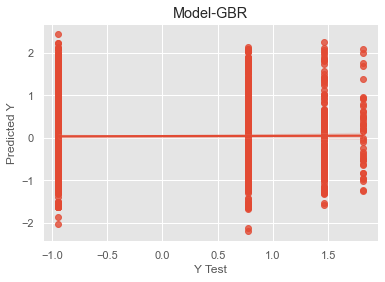

In [179]:
sns.regplot(x=y_test,y=pred_test)
plt.title("Model-GBR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

------------------------------------------------------------------------------------------------------------------------------

### AdaBoostRegressor

In [180]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    adr=AdaBoostRegressor()
    adr.fit(x_train,y_train)
    adr_pred=adr.predict(x_test)
    acc = r2_score(y_test, adr_pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.9904174940614698 seen for random state: 18


In [181]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=max_RS)

pred = adr.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred))
print('The mean absolute error', mean_absolute_error(y_test, pred))
print('The mean squared error', mean_squared_error(y_test, pred))
cv = cross_val_score(adr, x,y,cv=6)
print('The cross validation score', cv.mean())

The r2 score is: 0.9874365855980682
The mean absolute error 0.03677208048763168
The mean squared error 0.012631650415425263
The cross validation score 0.9794857988207272


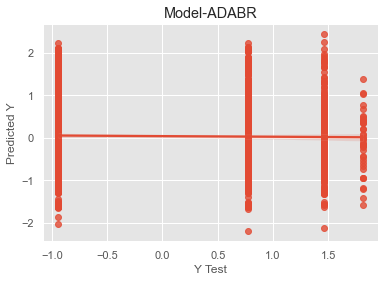

In [182]:
sns.regplot(x=y_test,y=pred_test)
plt.title("Model-ADABR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

------------------------------------------------------------------------------------------------------------------------------

### XGBRegressor

In [183]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    xgb=XGBRegressor()
    xgb.fit(x_train,y_train)
    xgb_pred=xgb.predict(x_test)
    acc = r2_score(y_test, xgb_pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.9959877962079776 seen for random state: 74


In [184]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=max_RS)

pred = xgb.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred))
print('The mean absolute error', mean_absolute_error(y_test, pred))
print('The mean squared error', mean_squared_error(y_test, pred))
cv = cross_val_score(xgb, x,y,cv=6)
print('The cross validation score', cv.mean())

The r2 score is: 0.9994776114793437
The mean absolute error 0.0033208479558293415
The mean squared error 0.000522479577564682
The cross validation score 0.9796484095392485


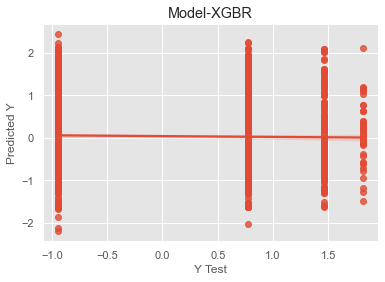

In [185]:
sns.regplot(x=y_test,y=pred_test)
plt.title("Model-XGBR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

------------------------------------------------------------------------------------------------------------------------------

In [186]:
np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=7))
    return(rmse)


models = [LinearRegression(),Ridge(),KNeighborsRegressor(),RandomForestRegressor(),
          XGBRegressor(),GradientBoostingRegressor(),AdaBoostRegressor()]
            
names = ['lr','ridge','knn','rfr','xgb','gbr','adr']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

lr    : 0.274238, 0.027216
ridge    : 0.274236, 0.027206
knn    : 0.115110, 0.077920
rfr    : 0.021525, 0.027146
xgb    : 0.019881, 0.023771
gbr    : 0.023423, 0.028312
adr    : 0.022046, 0.023665


### The best Algorithim is XGBoost Regressor 

In [187]:
# tunning Hyperparameters

params={'learning_rate':[0.001,0.01,0.1,0.3],
            'n_estimators':[100,300,500,700,1000,1200],
            'max_depth': [5,7,9,10,11,14,15],
            'min_child_weight':[1,3,5],'subsample':[0.7,0.9,1],'colsample_bytree':[0.7,0.9,1]}

xgb =RandomizedSearchCV(XGBRegressor(),params,scoring='r2',cv =6, n_iter = 130, n_jobs=-1,verbose=True)
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print('The r2 score is:', r2_score(y_test, y_pred))
print("\n The best estimator across ALL searched params:\n", xgb.best_estimator_)
print("\n The best score across ALL searched params:\n", xgb.best_score_)
print("\n The best parameters across ALL searched params:\n",xgb.best_params_)

Fitting 6 folds for each of 130 candidates, totalling 780 fits
The r2 score is: 0.9937451085720778

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

 The best score across ALL searched params:
 0.9929664028453651

 The best parameters across ALL searched params:
 {'subsample': 1, 'n_estimators': 500, 'min_child_wei

In [188]:
#reinstating with tuned parameters
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=74)
xgb_model = XGBRegressor(subsample=1,n_estimators=500, min_child_weight=5,max_depth=5,learning_rate=0.1,colsample_bytree=0.7).fit(x_train,y_train)
pred = xgb_model.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred))
print('The mean absolute error', mean_absolute_error(y_test, pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,pred)))

The r2 score is: 0.9937451085720778
The mean absolute error 0.02126177771020059
root_mean_squared_error: 0.07909476411525605


In [190]:
cv = cross_val_score(xgb_model, x,y,cv=6)
print('The cross validation score', cv.mean())

The cross validation score 0.9829053965651968


##### After tunning the XGboost Regressor there is an enchance ion the CV mean score, so i'll take it as my final model.

------------------------------------------------------------------------------------------------------------------------------

### Saving the Model

In [191]:
#Saving the model using .pkl
import joblib
joblib.dump(xgb_model,'Price range.pkl')

['Price range.pkl']

In [192]:
# load model and get predictions

model=joblib.load('Price range.pkl')

#Predict

prediction = model.predict(x_test)

prediction

array([ 0.773792  , -0.9252808 , -0.94124347, ..., -0.93166864,
        0.7717992 ,  0.7789972 ], dtype=float32)

In [193]:
pd.DataFrame([model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Original'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,...,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,1610,1611,1612,1613,1614,1615,1616,1617,1618,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1630,1631,1632,1633,1634,1635,1636,1637,1638,1639,1640,1641,1642,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663,1664,1665
Predicted,0.773792,-0.925281,-0.941243,0.775172,-0.939426,1.471508,0.768060,0.742219,1.464335,-0.945119,1.465990,1.444519,-0.226224,0.771015,-0.939073,1.465865,-0.938174,1.454905,-0.936353,0.774016,0.776081,1.470701,0.926933,0.767782,0.777467,0.779577,0.759721,0.775441,-0.942600,-0.934643,-0.776758,-0.945242,0.772112,-0.943163,-0.940850,1.461448,-0.941639,-0.942643,-0.941491,0.798808,1.762305,-0.918261,-0.709352,-0.931432,-0.940154,1.794554,0.779868,0.782487,-0.942538,-0.938799,1.461430,0.793297,0.770896,-0.941701,-0.941334,-0.952249,1.416245,1.511568,0.783807,1.469793,0.775315,1.390304,0.400727,-0.935534,-0.942674,0.774747,-0.943744,-0.941312,-0.952255,-0.943173,-0.940903,-0.942077,1.466557,0.770312,0.772702,1.461576,-0.928083,-0.944614,-0.943909,-0.879021,-0.941808,-0.938674,0.782028,1.471679,0.764199,0.764969,-0.943069,0.778194,-0.947911,0.771221,0.793770,-0.938042,0.794054,-0.943352,0.767363,-0.945239,1.647445,-0.928578,0.775087,-0.93618

### Done with Pleasure